<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/STAT380_2_3_(2025)_Probability_models_for_Y_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivation

Consider the following examples

## Example 1

* A hospital typically sees 2 emergency room admissions per day
* On a day following an unusually high pollution episode, it admits 4 people
* Is this “abnormal”, potentially attributable to the pollution, or is this within the realm of “normal”?


## Example 2

* On average in a given year, a village experiences 4.6 cases of Typhoid fever
* If there are 4 cases of Typhoid in a 3-month period, is this concern that an epidemic might be starting?


The binomial model doesn't work for either of these examples.  Why not?

# The Poisson distribution

The Poisson probability distribution is often used to model data that count the number of occurrences in space or time.

Examples:
* $Y$ represents \# of fractures per cm of nonspinalbone for women with osteoperosis
* $Y$ represents \# of bacteria per mm<sup>2</sup> on an agar plate
* $Y$ represents  \# of hospital admissions per week
* $Y$ represents \# of E-coli poisonings per day

Whereas the relevant parameters of the binomial model were $n$ and $p$, the Poisson parameter is $\lambda$: the rate of occurrences of a single unit of space or time.  Since the amount of time $t$ or amount of space $A$ over which $Y$ is observed is also crucial, we can include this in our parameterization of the model.

## Model over time

* $Y$: random number of occurrences per $t$ time units
* $\lambda$: the average rate of occurrences per single unit of time
* $t$: the number of time units over which we observe $Y$
* $\mu = \lambda t$ : expected number of occurrences per $t$ time units

$$P(Y=k) = \frac{e^{-\lambda t} (\lambda t)^k}{k!}; k = 0, 1, 2, ...$$

In this case we would say $Y \sim POI(\lambda t)$.

## Model over space

* $Y$: random number of occurrences per $A$ space units
* $\lambda$: the average rate of occurrences per single unit of space
* $A$: the number of space units over which we observe $Y$
* $\mu = \lambda A$ : expected number of occurrences per $A$ space units

$$P(Y=k) = \frac{e^{-\lambda A} (\lambda A)^k}{k!}; k = 0, 1, 2, ...$$

In this case we would say $Y\sim POI(\lambda A)$.

## The $\mu$, $\lambda$ relationship

Just to keep things clear:

* $\lambda$ is an average *count per $1$ unit time*
* $\mu$ is an average *count over $t$ time units or $A$ space units*

$\mu$ accounts both for the underlying rate parameter $\lambda$, and the amount of time or space over which $Y$ is measured:

## Visual for $\lambda = 4$

* On average, $\mu = 4 \cdot 1$ occurrences per 1 time unit:

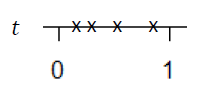

* On average, $\mu = 4\cdot 3 = 12$ occurrences per 3 time units:

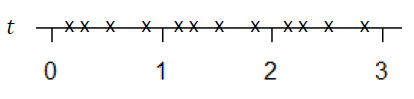

* On average, $\mu = 4\cdot 0.5 = 2$ occurrences per half time unit:

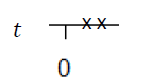

Accordingly, when finding probabilities for $Y$, it's important to know both the underlying parameter $\lambda$ ***and*** the amount of time or space over which $Y$ is measured!!

## Applying the Poisson model: Example 1

* A hospital typically sees 2 emergency room admissions per day
*  On a day following an unusually high pollution episode, it admits 4 people
* Is this “abnormal”, potentially attributable to the pollution, or is this within the realm of “normal”?



* Let $Y$ represent number of admissions on a random day
* $\lambda=2$: average admissions per day
* $t = 1$: the time unit over which we observe $Y$
* $\mu = 2\cdot 1 = 2$

$$P(Y=4) = \frac{e^{-2} 2^4}{4!} = 0.09$$

$$P(Y\geq 4) = \sum_{k=4}^\infty \frac{e^{-2} 2^k}{k!} = 1- \sum_{k=0}^3 \frac{e^{-2} 2^k}{k!} = 0.14$$

* What conclusion would we make with this probability?
- **Since 14% > 5% (our typical "unusual" threshold), this does not suggest that the underlying rate has increased from 2 visits/day.**

## Applying the Poisson model: Example 2

* On average in a given year, a village experiences 4.6 cases of Typhoid fever.
* If there are 4 cases of Typhoid *in a 3-month period*, is this concern that an epidemic might be starting?



* Let $Y$ represent number of Typhoid cases in a random 3-month period
* $\lambda=4.6$: average cases per year
* $t = 0.25$: the time unit over which we observe $T$
* $\mu = 4.6\cdot 2.5 = 1.15$

$$P(Y=4) = \frac{e^{-1.15} 1.15^4}{4!} = 0.023$$

$$P(Y\geq 4) = 1- \sum_{k=0}^3 \frac{e^{-1.15} 1.15^k}{k!} = 0.03$$

* What conclusion would we make with this probability?
 - **Since the likelihood of seeing 4 or more is sufficiently small (less than 5%), this suggests that the underlying Typhoid rate is perhaps increasing.**

## In R

To find $P(Y=k)$ in R, with $\mu = \lambda t$:

`dpois(k, mu)`

To find $P(Y\leq k)$ in R, with $\mu = \lambda t$:

`ppois(k, mu)`

To generate $N$ random realizations of a Poisson with mean $\mu$:

`rpois(N, mu)`

## Mean-variance relationship

If $Y$ represents the random number of counts over $t$ time units, and $Y\sim POI(\lambda t)$, then:

* $E(Y) = \mu = \lambda t$
* $Var(Y) = \mu = \lambda t$

I.e. the mean and variance are equal!


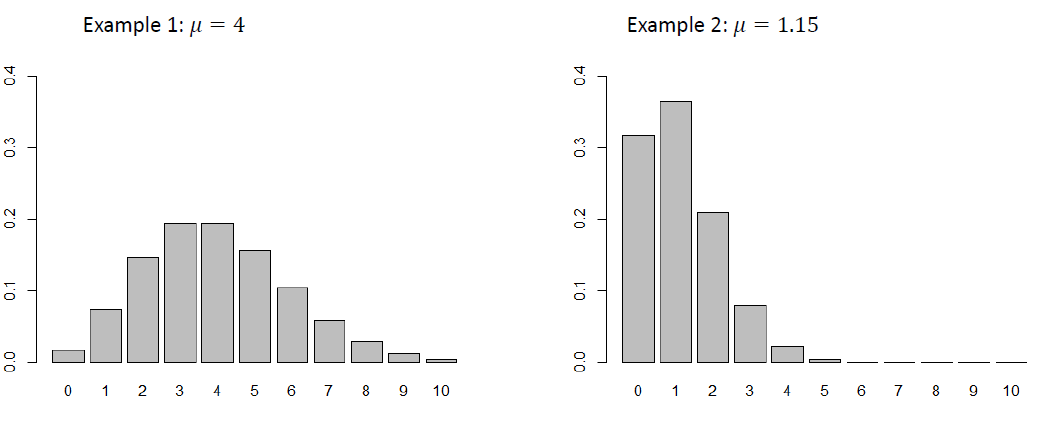

### Simulation study: $\mu = 4$

In [1]:
manyY <- rpois(10000, 4)

In [2]:
mean(manyY)

[1] 4.0373

In [3]:
var(manyY)

[1] 4.003309

* Both of these simulated results are close approximations of what number? **4**

Finding the simulated $\hat P(Y=k)$:

In [4]:
count.table <- xtabs(~manyY)
prop.table(count.table)

manyY
     0      1      2      3      4      5      6      7      8      9     10 
0.0166 0.0730 0.1435 0.1911 0.1941 0.1620 0.1058 0.0628 0.0293 0.0137 0.0054 
    11     12     13     14 
0.0014 0.0009 0.0003 0.0001 

Plotting the simulated probability distribution:

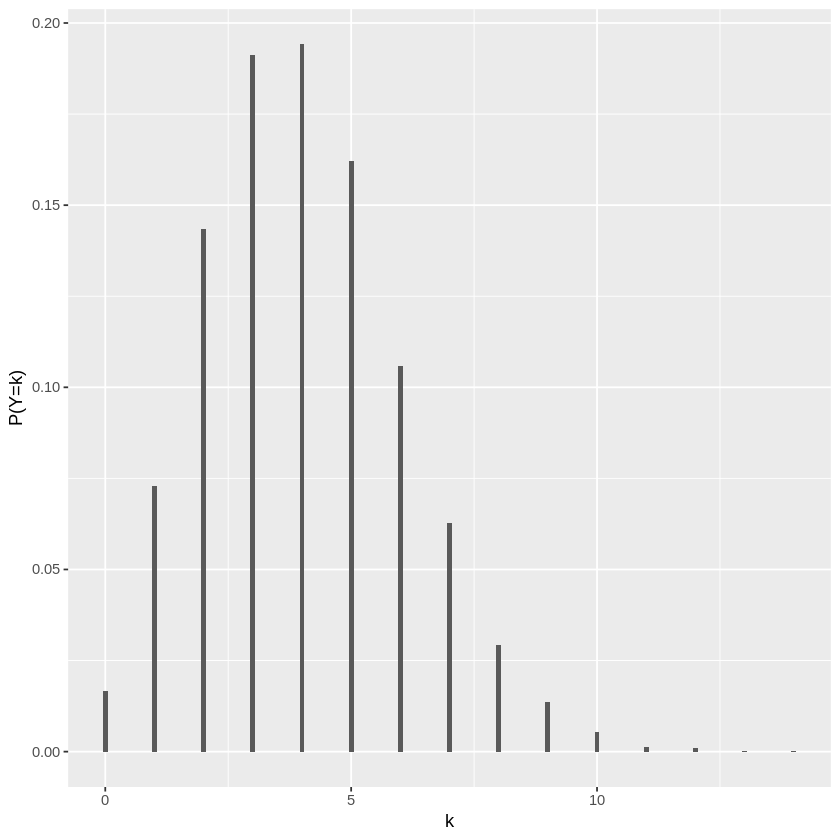

In [5]:
library(ggplot2)
ggplot() + geom_bar(aes(x = manyY, y = after_stat(prop)), width = 0.1) +
  ylab('P(Y=k)') + xlab('k') #+ ylim(c(0,.4))

Comparing the *approximated* probabilities to the *exact* probabilities:

In [6]:
prop.table(count.table)

manyY
     0      1      2      3      4      5      6      7      8      9     10 
0.0166 0.0730 0.1435 0.1911 0.1941 0.1620 0.1058 0.0628 0.0293 0.0137 0.0054 
    11     12     13     14 
0.0014 0.0009 0.0003 0.0001 

In [7]:
round(dpois(0:12, 4),4)

[1] 0.0183 0.0733 0.1465 0.1954 0.1954 0.1563 0.1042 0.0595 0.0298 0.0132
[11] 0.0053 0.0019 0.0006

### Simulation study: $\mu = 1.5$

In [8]:
manyY <- rpois(10000, 1.5)
mean(manyY)
var(manyY)

[1] 1.5232

[1] 1.525414

* Both of these simulated results are close approximations of what number?

In [9]:
count.table <- xtabs(~manyY)
prop.table(count.table)

manyY
     0      1      2      3      4      5      6      7      8      9 
0.2194 0.3265 0.2594 0.1274 0.0478 0.0144 0.0038 0.0009 0.0002 0.0002 

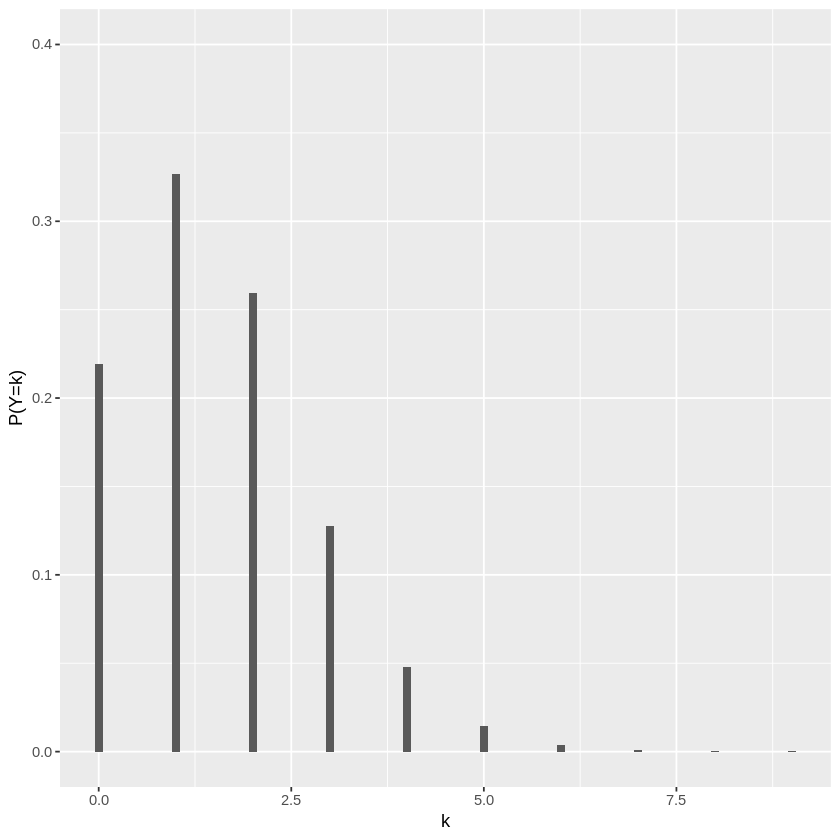

In [10]:
ggplot() + geom_bar(aes(x = manyY, y = after_stat(prop)), width = 0.1) +
  ylab('P(Y=k)') + xlab('k') + ylim(c(0,.4))


Comparing the *approximated* probabilities to the *exact* probabilities:

In [11]:
prop.table(count.table)

manyY
     0      1      2      3      4      5      6      7      8      9 
0.2194 0.3265 0.2594 0.1274 0.0478 0.0144 0.0038 0.0009 0.0002 0.0002 

In [12]:
round(dpois(0:12, 1.5),4)

[1] 0.2231 0.3347 0.2510 0.1255 0.0471 0.0141 0.0035 0.0008 0.0001 0.0000
[11] 0.0000 0.0000 0.0000

# Application in clinical trials

A common usage of the Poisson model is in clinical trials, where people are followed over an amount of time until some event occurs (e.g., cancer relapse).  In these situations,  $\lambda$  measures the rate of occurrences for a single unit of person-follow-up-time and is often referred to as an *incidence rate.*


## Motivation

Consider two exposure groups, each with 10 subjects.  "Censored" means "outcome not observed" (either the study ended while participant was still alive; participant dropped out; etc.)

Which group had it worse?

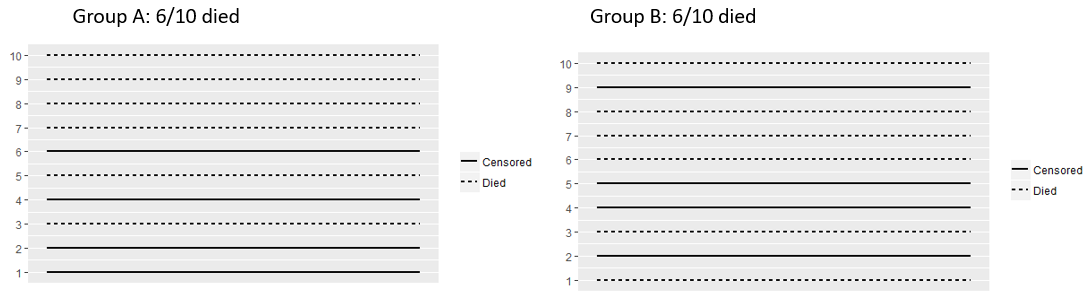

Suppose the graph above was only part of the story.  In fact, the groups were followed for different amounts of time.

Given this information, which group had it worse?

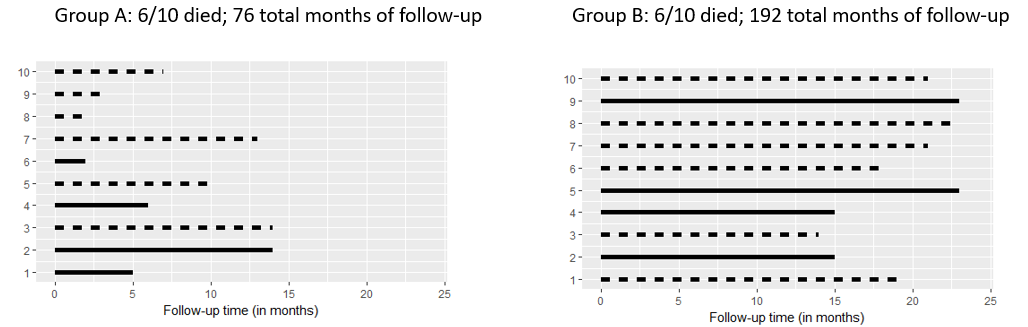

## Estimating $\lambda$


* This example illustrates that it wastes information to analyze data using individuals as observational unit with a binary  $Y = 1$ or $Y=0$ depending on survival status alone, since $P(Y=1)$ is much smaller for people followed for short amounts of time.  Thus the binomial model inappropriate: $p$ varies from person-to-person
* Instead, treat $Y=(outcome\ status,\ person\ time)$ as the joint response variable
* Estimate $\lambda$ by aggregating across these observational units and measuring # of occurrences per unit person-time:

$$\hat\lambda = \frac{\mbox{# of observed events}}{\mbox{# of observed person-time units}}$$

* Often standardized to some “large” amount (e.g., 10,000 units of person-time)


Previous example, revisited:

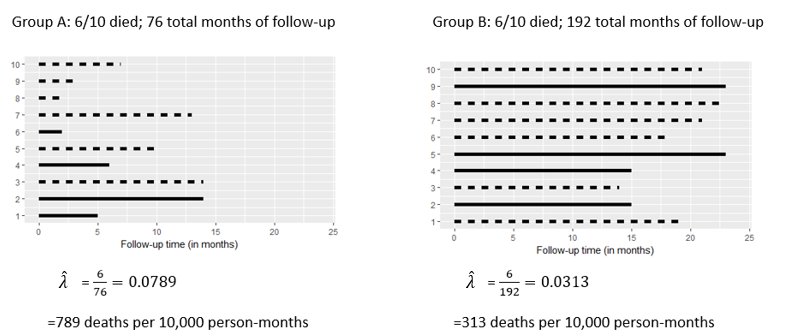

You can see why these are often standardized to some "large" amount of person-time; the interpretations as-is would be "$\hat\lambda$ = 0.0789 deaths per 1 person-month for Group A" and "$\hat\lambda$ = 0.0313 deaths per 1 person-month for Group B"; not exactly highly meaningful interpretations!

We can then use $\hat\lambda$ parameter to find probabilities for the number of events in $t$ person-time units.

With $Y \equiv$ number of events in $t$ person-time units:

$$P(Y=k) = \frac{e^{-\hat\lambda t}(\hat\lambda t)^k}{k!}; k = 0,1,...$$

## Example

Adapted from Rosner ex. 14.4:
* Average rate of breast cancer among normal women aged 60-64 is 400 cases per 100,000 person-years
* A registry is set up during the period 1990-1994 of women with a suspected genetic marker for breast cancer but who are currently cancer-free
* 500 women aged 60-64 followed until 12/31/2000
* Follow-up times variable; 4000 total person-years measured
* 28 new breast cancer cases
* Is the rate of cases significantly higher among women with this marker?


We are testing the following hypotheses:

$$H_0: \lambda = \frac{400}{10^5}$$
$$H_a: \lambda > \frac{400}{10^5}$$

If we observed 4000 total person-years, on the $\mu$ ***count*** scale this becomes:

$$H_0: \mu = 4000\cdot\frac{400}{10^5} = 16$$
$$H_a: \mu > 4000 \cdot \frac{400}{10^5} > 16$$

Simulating:

In [17]:
# In 1 year, 0.004% death rate
400/100000

[1] 0.004

In [13]:
manysamples <- rpois(10000, 16)
prop.table(xtabs(~manysamples))

manysamples
     4      5      6      7      8      9     10     11     12     13     14 
0.0003 0.0008 0.0027 0.0061 0.0112 0.0214 0.0345 0.0478 0.0678 0.0833 0.0937 
    15     16     17     18     19     20     21     22     23     24     25 
0.1018 0.0979 0.0935 0.0830 0.0651 0.0542 0.0416 0.0320 0.0236 0.0160 0.0084 
    26     27     28     29     30     31     32     34     35     36 
0.0060 0.0037 0.0020 0.0006 0.0005 0.0001 0.0001 0.0001 0.0001 0.0001 

In [14]:
mean(manysamples >= 28)

[1] 0.0036

Finding the exact probability:

In [15]:
1-ppois(27, 16)

[1] 0.004105062

Conclusion?
**Since the sample outcome is so unlikely to have occoured by random chance alone if the cancer rate is the same as baseline, this supports a higher cancer rate among women with this marker**

# Modeling $\lambda$ with a covariate

As in the binomial setting, we are often interested in how the Poisson parameter $\lambda$ changes with some covariate $X$.  This is explored in question 2 of the accompanying activity!